In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import os
import torch

In [2]:
results_folder = "../../cata/run/results/figure_3/"

In [111]:
def extract_ode_error_logs(results_folder: str, i_range):
    error_0 = {}
    error_1 = {}
    for i in i_range:
        i_df = pd.read_csv(os.path.join(results_folder, f"feature_{i}", "0", "data_logger_ode.csv"))
        error_0[i] = np.array(i_df["log_generalisation_error_0"])
        error_1[i] = np.array(i_df["log_generalisation_error_1"])
    return error_0, error_1


def extract_network_error_logs(path: str, i_range):
    error_0 = {}
    error_1 = {}
    for i in i_range:
        i_df = pd.read_csv(os.path.join(path, f"feature_{i}", "0", "data_logger_network.csv"))
        error_0[i] = np.array(i_df["log_generalisation_error_0"])
        error_1[i] = np.array(i_df["log_generalisation_error_1"])
    return error_0, error_1

In [113]:
i_range = np.linspace(0, 1, 11)
error_0 , error_1 = extract_ode_error_logs(results_folder, i_range)
error_0_ , error_1_  = extract_network_error_logs(results_folder, i_range)

## Generalisation Error

C:\Users\USER\AppData\Local\Temp\ipykernel_15384\154781866.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("viridis")
C:\Users\USER\AppData\Local\Temp\ipykernel_15384\154781866.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("viridis")
C:\Users\USER\AppData\Local\Temp\ipykernel_15384\154781866.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


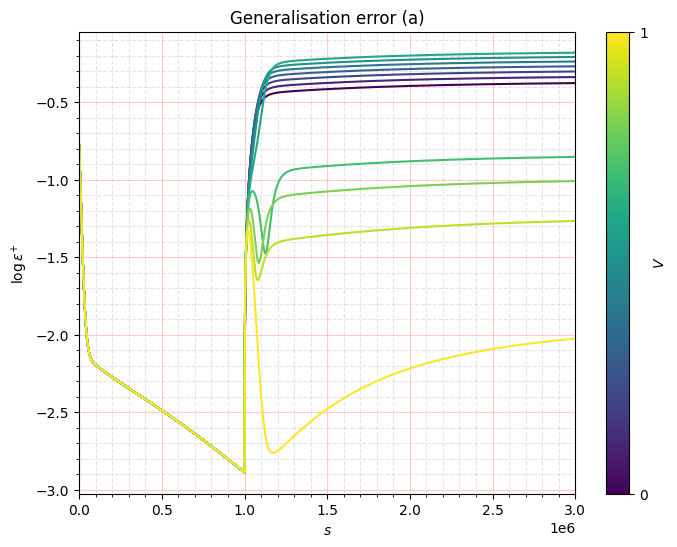

In [181]:
import matplotlib.colors as mcolors

fig1, ax = plt.subplots(figsize=(8,6))
color_map = cm.get_cmap("viridis")
norm = mcolors.Normalize(vmin=0, vmax=1)

for i, (overlap, err) in enumerate(error_0_.items()):
    ax.plot(10*np.arange(len(err)), err, color=color_map(overlap))
# Grid settings
ax.minorticks_on()
ax.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
ax.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)

color_map = cm.get_cmap("viridis")

# Colorbar

sm = cm.ScalarMappable(cmap=color_map, norm=norm)
cbar = fig1.colorbar(sm, ax=ax, label=r"$V$")
cbar.set_ticks([0, 1])
cbar.ax.set_yticklabels(["0", "1"])

# Labels
ax.set_xlabel(r"$s$")
ax.set_ylabel(r"$\log \epsilon^{+}$")

# Style adjustments
ax.set_xlim(0, 3e6)  # Adjust range based on the image
# ax.set_ylim(-5, 0)  # Logarithmic scaling

plt.title("Generalisation error (a)")
fig1.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_15384\69427103.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("plasma")
C:\Users\USER\AppData\Local\Temp\ipykernel_15384\69427103.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


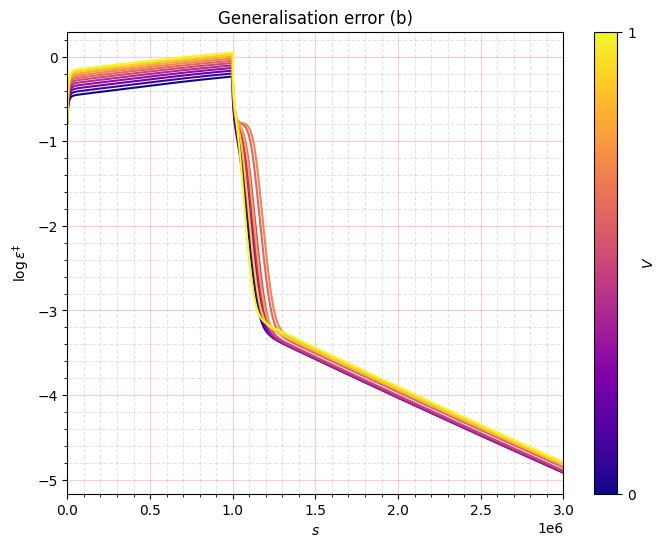

In [182]:
color_map = cm.get_cmap("plasma")
norm = mcolors.Normalize(vmin=0, vmax=1)

fig2, ax = plt.subplots(figsize=(8, 6))

for i, (overlap, err) in enumerate(error_1_.items()):
    plt.plot(10*np.arange(len(err)), err,  color=color_map(overlap))
# Grid settings
ax.minorticks_on()
ax.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
ax.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)
# Labels
ax.set_xlabel(r"$s$")
ax.set_ylabel(r"$\log \epsilon^{\ddagger}$")

# Colorbar
sm = cm.ScalarMappable(cmap=color_map, norm=norm)
cbar = fig2.colorbar(sm, ax=ax, label=r"$V$")
cbar.set_ticks([0, 1])
cbar.ax.set_yticklabels(["0", "1"])

ax.set_xlim(0, 3e6)

plt.title("Generalisation error (b)")
fig2.show()
# fig.savefig("long_time_transfer.pdf", dpi=100)

## Aggregate  Forgetting

C:\Users\USER\AppData\Local\Temp\ipykernel_15384\908886305.py:79: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("viridis")
C:\Users\USER\AppData\Local\Temp\ipykernel_15384\908886305.py:41: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
C:\Users\USER\AppData\Local\Temp\ipykernel_15384\908886305.py:75: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig3.show()


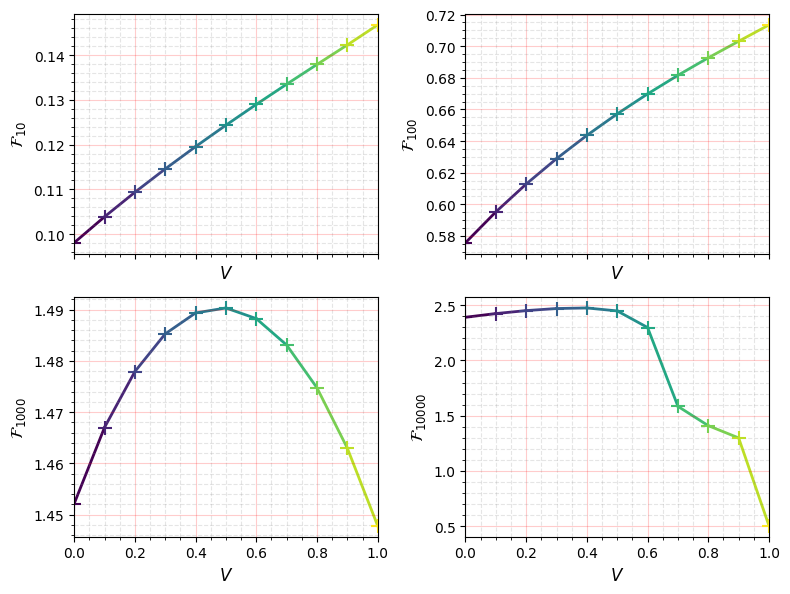

In [186]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

def plot_all_forgetting(all_ode_errors, all_network_errors, cross_frequency, switch_index, ylim_values, color_map, axis_labels):
    fig3, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey=False)

    # Define colormap normalization
    norm = mcolors.Normalize(vmin=0, vmax=len(all_ode_errors)-1)

    N_values = [10, 100, 1000, 10000]  # Corresponding subplot labels
    for ax, N in zip(axes.flatten(), N_values):
        forgettings = []
        net_forgettings = []

        # Compute forgetting curves
        for i, (o, errors) in enumerate(all_ode_errors.items()):
            switch_error = errors[switch_index]
            N_error = errors[switch_index+N]
            forgetting = N_error - switch_error
            forgettings.append((o, forgetting))

        # Plot forgetting curves
        for i in range(len(forgettings) - 1):
            ax.plot(
                [forgettings[i][0], forgettings[i + 1][0]],
                [forgettings[i][1], forgettings[i + 1][1]],
                color=color_map(norm(i)),
                linewidth=2,
                zorder=1
            )

        # Scatter points for network errors
        for i, (o, errors) in enumerate(all_network_errors.items()):
            if i % cross_frequency == 0:
                switch_error = errors[switch_index]
                N_error = errors[switch_index+N]
                forgetting = N_error - switch_error
                net_forgettings.append((o, forgetting))
                ax.scatter(
                    [o], [forgetting], 
                    color=color_map(norm(i)), 
                    marker='+', s=100, edgecolors='black', linewidth=1.5, zorder=2
                )

        # Grid settings
        ax.minorticks_on()
        ax.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
        ax.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)

        # Axis labels
        if not axis_labels:
            ax.tick_params(
                axis='both', which='both',
                bottom=False, top=False, left=False,
                labelbottom=False, labelleft=False
            )

        # Set limits
        ax.set_xlim(0, 1)
   

        # Set label
        ax.set_xlabel(r"$V$", fontsize=12)
        ax.set_ylabel(r"$\mathcal{F}_{" + str(N) + r"}$", fontsize=12)


    # Adjust layout
    plt.tight_layout()
    
    # Save figure
    plt.savefig("cross_section_plots.pdf", dpi=300, bbox_inches='tight', pad_inches=0)
    # plt.show()
    fig3.show()
    return fig3

# Example Usage
color_map = cm.get_cmap("viridis")

fig3 = plot_all_forgetting(
    error_0_, error_0_, cross_frequency=1, switch_index=100000,
    ylim_values=None, color_map=color_map, axis_labels=True
)


## Aggregate Transfer

C:\Users\USER\AppData\Local\Temp\ipykernel_15384\1416374444.py:76: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("plasma")
C:\Users\USER\AppData\Local\Temp\ipykernel_15384\1416374444.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


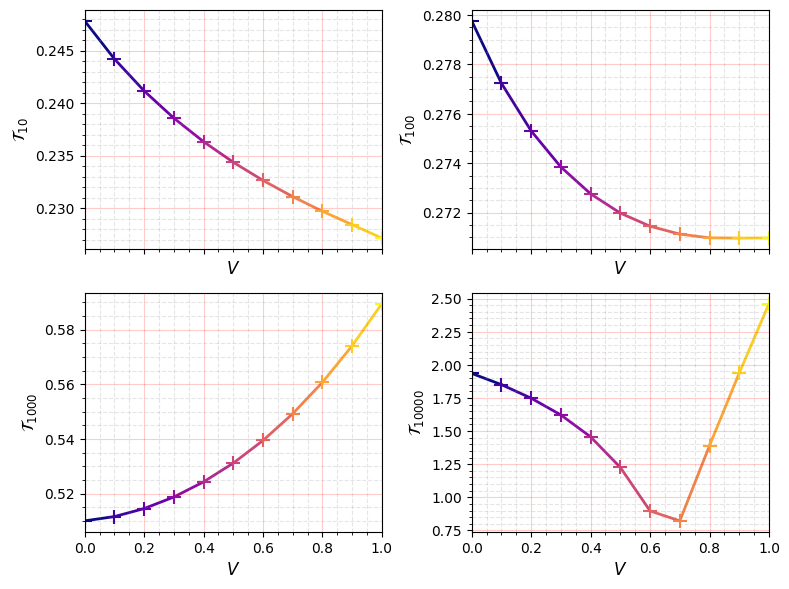

In [158]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

def plot_cross_section_transfer(all_ode_errors, all_network_errors, cross_frequency, switch_index, ylim_values, color_map, axis_labels):
    fig4, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey=False)

    # Define colormap normalization
    norm = mcolors.Normalize(vmin=0, vmax=len(all_ode_errors)-1)

    N_values = [10, 100, 1000, 10000]  # Labels for y-axis
    for ax, N in zip(axes.flatten(), N_values):
        transfers = []
        net_transfers = []

        # Compute transfer values
        for i, (o, errors) in enumerate(all_ode_errors.items()):
            switch_error = errors[switch_index]
            N_error = errors[switch_index+N]
            transfer = switch_error - N_error
            
            transfers.append((o, transfer))

        # Plot transfer curves
        for i in range(len(transfers) - 1):
            ax.plot(
                [transfers[i][0], transfers[i + 1][0]],
                [transfers[i][1], transfers[i + 1][1]],
                color=color_map(norm(i)),
                linewidth=2,
                zorder=1
            )

        # Scatter points for network transfers
        for i, (o, errors) in enumerate(all_network_errors.items()):
            if i % cross_frequency == 0:
                switch_error = errors[switch_index]
                N_error = errors[switch_index+N]
                transfer = switch_error - N_error
                net_transfers.append((o, transfer))
                ax.scatter(
                    [o], [transfer], 
                    color=color_map(norm(i)), 
                    marker='+', s=100, edgecolors='black', linewidth=1.5, zorder=2
                )

        # Grid settings
        ax.minorticks_on()
        ax.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
        ax.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)

        # Axis labels
        if not axis_labels:
            ax.tick_params(
                axis='both', which='both',
                bottom=False, top=False, left=False,
                labelbottom=False, labelleft=False
            )

        # Set limits
        ax.set_xlim(0, 1)
  
        ax.set_xlabel( r"$V$", ha='center', fontsize=12)
        ax.set_ylabel(r"$\mathcal{T}_{" + str(N) + r"}$", fontsize=12)
        
    # Adjust layout
    plt.tight_layout()
    
    # Save figure
    plt.savefig("cross_section_transfer_plots.pdf", dpi=300, bbox_inches='tight', pad_inches=0)
    plt.show()
    return fig4

# Example Usage
color_map = cm.get_cmap("plasma")


fig4 = plot_cross_section_transfer(
    error_1_, error_1_, cross_frequency=1, switch_index=100000,
    ylim_values=None, color_map=color_map, axis_labels=True
)


## Combined figure 

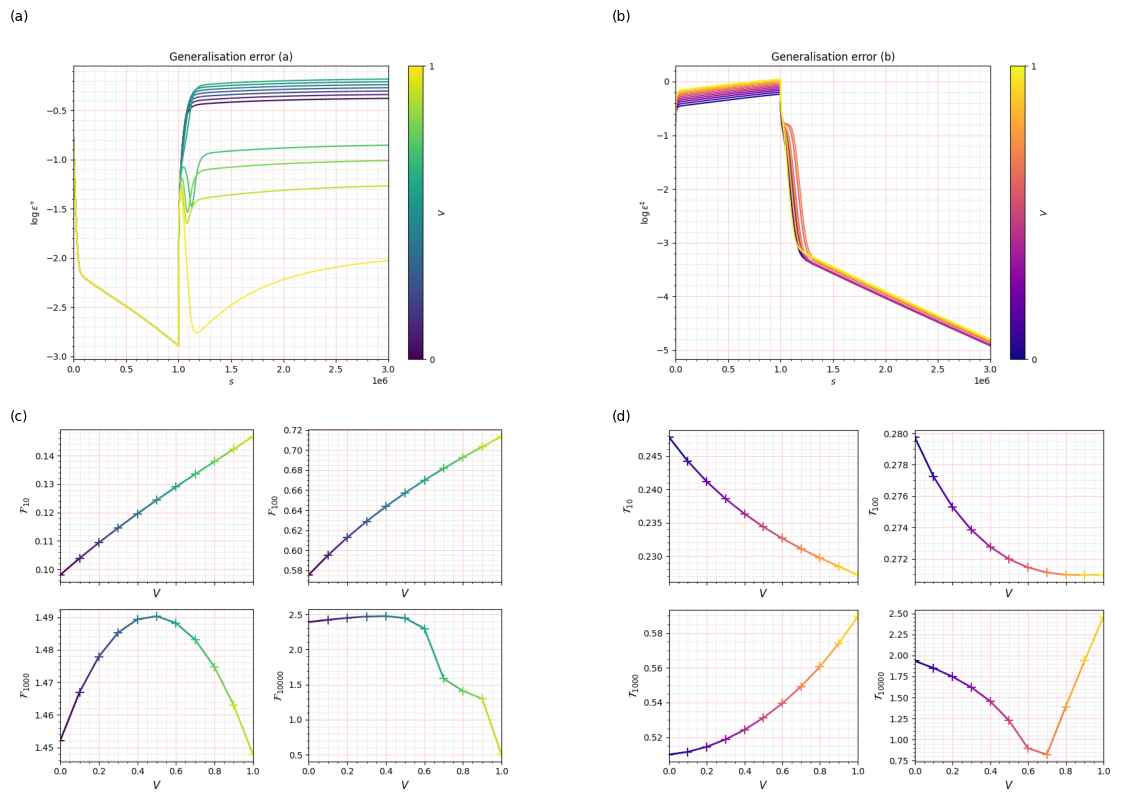

Figures saved in Figure3.pdf


In [187]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Create a 2x2 figure layout
fig, axes = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)

# Order of figures (matching the reference image)
figures = [fig1, fig2, fig3, fig4]
labels = ["(a)", "(b)", "(c)", "(d)"]  # Labels for each subplot

# Loop through and place each subplot correctly
for ax, subfig, label in zip(axes.flatten(), figures, labels):
    subfig.canvas.draw()  # Ensure it is drawn before using
    ax.imshow(subfig.canvas.buffer_rgba())  # Convert figure to image
    ax.axis('off')  # Remove axes
    ax.text(0, 1.0, label, transform=ax.transAxes, fontsize=10)

# Show the final combined figure
plt.show()

# Save the combined figure as a PDF
pdf_filename = "Figure3.pdf"
with PdfPages(pdf_filename) as pdf:
    pdf.savefig(fig, dpi=300, bbox_inches='tight')
    print(f"Figures saved in {pdf_filename}")
